# Face detection and recognition with Dlib
In this notebook I'll try out Dlib's HOG based face detector and ResNet face recognition model.
>The **histogram of oriented gradients (HOG)** is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image. 

>A **residual neural network (ResNet)** is an artificial neural network of a kind that builds on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers. Typical ResNet models are implemented with double- or triple- layer skips that contain nonlinearities (ReLU) and batch normalization in between.

In [6]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils

### Load image

Loading image using OpenCV

In [27]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to rgb
    return img

img = load_image('img/himym.jpg')

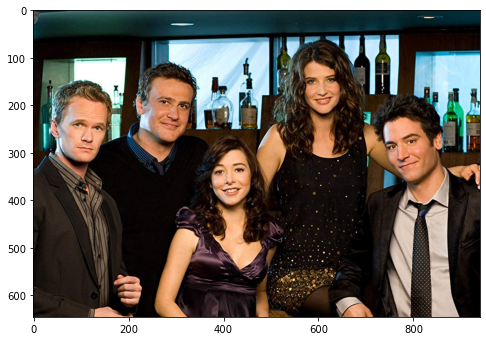

In [28]:
def show_image(img):
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.show()
    
show_image(img)

### Detect faces

Use HOG frontal face detector to detect faces and mark them with squares

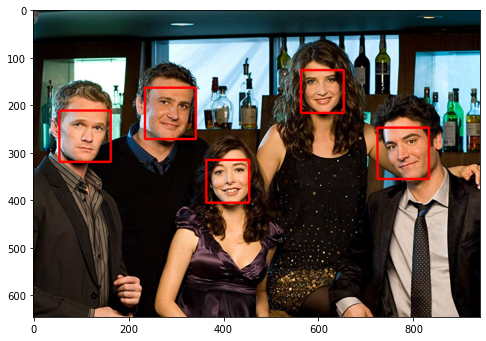

In [39]:
def detect_faces(img):
    face_detect = dlib.get_frontal_face_detector()
    faces = face_detect(img, 1)
    return faces

def mark_faces(faces, img):
    for (i, face) in enumerate(faces):
        (x, y, w, h) = face_utils.rect_to_bb(face)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)

faces = detect_faces(img)
marked_img = img.copy()        
mark_faces(faces, marked_img)
show_image(marked_img)

### Encode detected faces

Load models from files.

In [ ]:
face_encoder = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')
shape_predictor = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')

Crop and encode detected faces. ResNet transforms faces into descriptors – 128-dimensional vectors.

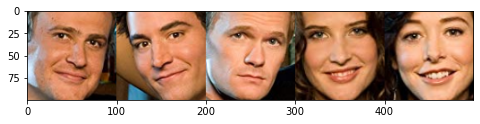

In [43]:
def encode_faces(img, faces):
    cropped_faces = []
    descriptors = []
    for face in faces:
        shape = shape_predictor(img, face)
        face_descriptor = face_encoder.compute_face_descriptor(img, shape)
        descriptors.append(face_descriptor)
        cropped = img[face.top():face.bottom(),face.left():face.right()]
        cropped = cv2.resize(cropped, (100, 100))
        cropped_faces.append(cropped)
    return (descriptors, cropped_faces)

descriptors, cropped_faces = encode_faces(img, faces)  
show_image(np.concatenate(cropped_faces, axis=1))

Let's see how face descriptor looks like.

In [22]:
descriptors[0]

dlib.vector([-0.186843, 0.124535, 5.15245e-05, -0.0801888, -0.121109, 0.0211776, -0.0255788, -0.0164238, 0.149322, -0.0848459, 0.162492, -0.0575225, -0.281636, -0.0012592, 0.0316956, 0.161965, -0.0792492, -0.0622915, -0.1213, -0.0980635, 0.0166491, 0.0496021, -0.0404332, 0.0183484, -0.10492, -0.30464, -0.0576323, -0.0253829, 0.0683166, -0.0944217, -0.0103497, -0.0678916, -0.165556, -0.114805, 0.0286301, 0.217684, -0.131068, -0.0853793, 0.175213, 0.0387417, -0.101602, 0.00476795, 0.0230582, 0.337782, 0.135519, 0.00913821, 0.0610924, -0.135199, 0.0827653, -0.249231, 0.144357, 0.099277, 0.105134, 0.127013, 0.0963035, -0.182338, 0.0854934, 0.210376, -0.254321, 0.0707641, 0.141173, 0.0770691, -0.0257973, -0.0374108, 0.233699, 0.125085, -0.080412, -0.162358, 0.228614, -0.116206, -0.0142881, 0.00162353, -0.0831228, -0.225157, -0.274203, 0.130807, 0.326678, 0.231152, -0.163001, -0.0152297, -0.0501224, -0.0419638, 0.114652, -0.00917149, -0.0810612, -0.0351467, -0.0497058, 0.0933585, 0.183131, -

As I mentioned before, it is a 128-dimensional vector.

In [65]:
print(f'Vector length: {len(descriptors[0])}')

Vector length: 128


### Compare faces

Now I'll load a face to compare with.

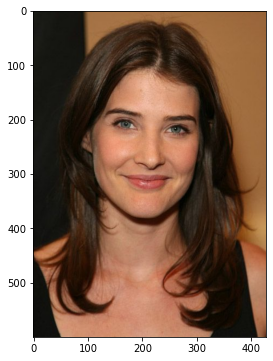

In [41]:
cobie = load_image('img/cobie.jpg')
show_image(cobie)

Detect, crop and encode as well.

In [42]:
cobie_face = detect_faces(cobie)
cobie_desc, cobie_cr_face = encode_faces(cobie, cobie_face)

To compare faces we need to calculate distance between their vectors (descriptors). Similar faces will have smaller distance, dissimilar faces – greater distance.

In [70]:
def calculate_distance(face1, face2):
    face1 = np.asarray(face1)
    face2 = np.asarray(face2)
    return np.linalg.norm(face1 - face2, axis=0)

distances = [calculate_distance(cobie_desc[0], desc) for desc in descriptors]

Let's look at the faces side by side and at distances between them.

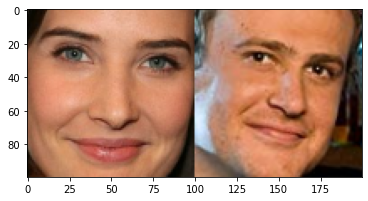

Distance 0: 0.8007025183843085


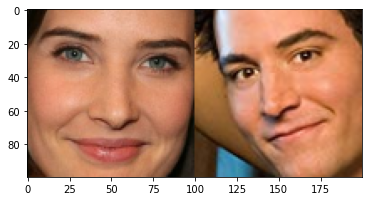

Distance 1: 0.8731695100380158


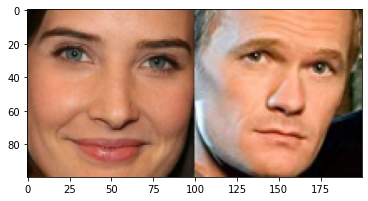

Distance 2: 0.9867322819051574


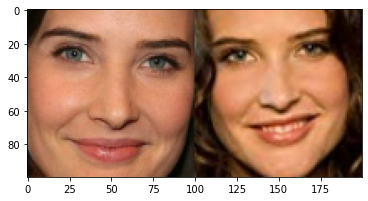

Distance 3: 0.32737940636370094


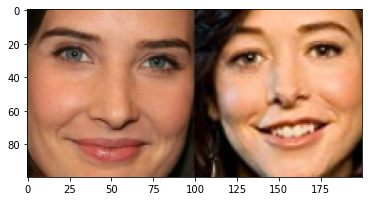

Distance 4: 0.7797958764400252


In [74]:
for i, distance in enumerate(distances):
    plt.imshow(np.concatenate((cobie_cr_face[0], cropped_faces[i]), axis=1))
    plt.show()
    print(f'Distance {i}: {distance}')

In [75]:
min_distance = min(distances)
min_distance_index = distances.index(min_distance)

print(f'Minimum distance: {min_distance}')
print(f'Minimum distance index: {min_distance_index}')

Minimum distance: 0.32737940636370094
Minimum distance index: 3


The face with index 3 has minimum distance to the compared face. And as we see it is the same person.

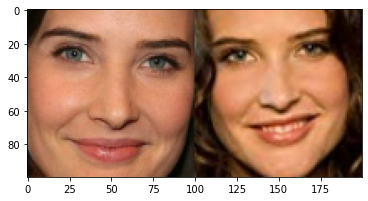

In [76]:
plt.imshow(np.concatenate((cobie_cr_face[0], cropped_faces[min_distance_index]), axis=1))
plt.show()